To start I imported a variety of modules that I'll need later and import the data

In [36]:
import pandas as pd, numpy as np, torch, torch.nn as nn, torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from pathlib import Path
import matplotlib.pyplot as plt

base_path = Path()
profit_file = base_path.joinpath('eda_classification.csv')
profit_df = pd.read_csv(profit_file, skipinitialspace=True)
profit_df.dropna(inplace=True)
profit_df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,y
0,-17.933519,Jun,6.559220,-14.452810,-4.732855,0.381673,2.563194,"($1,306.52)",-89.394348,-28.454044,-16.201298,-0.01%,0.217010,tesla,thurday,9.729891,-0.786431,small,1
1,-37.214754,July,10.774930,-15.384004,-0.077339,10.983774,-15.210206,($24.86),153.032652,-32.557736,69.675903,0.00%,-3.584908,Toyota,thur,35.727926,-0.985552,small,0
2,0.330441,Aug,-19.609972,-9.167911,2.064124,12.071688,12.506141,($110.85),-141.437276,-20.794952,55.042604,0.00%,-3.991366,bmw,wednesday,-9.283523,-3.394718,small,1
3,-13.709765,Aug,-8.011390,6.759264,1.727615,-1.768382,24.039733,($324.43),51.039653,-7.046908,-31.424419,0.01%,7.908897,Toyota,wed,-2.891882,-2.690222,small,0
4,-4.202598,May,7.076210,-26.004919,-4.269696,-3.414224,2.115989,"$1,213.37",-31.046700,19.061182,-31.525515,-0.01%,0.846719,Honda,wednesday,25.497480,3.516801,small,1


Next I borrow some code from before and strip a few different text strings from the data to format the numbers into floats.

In [37]:
profit_df['x11'] = profit_df['x11'].str.strip('%').astype(float) / 100
profit_df['x7'] = profit_df['x7'].str.replace(r'[\)\$\,]','')
profit_df['x7'] = profit_df['x7'].str.replace(r'\(','-').astype(float)
print(profit_df.shape)
profit_df.head()

(9968, 19)


C:\Users\sebas\AppData\Local\Temp\ipykernel_21004\3296538578.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  profit_df['x7'] = profit_df['x7'].str.replace(r'[\)\$\,]','')
C:\Users\sebas\AppData\Local\Temp\ipykernel_21004\3296538578.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  profit_df['x7'] = profit_df['x7'].str.replace(r'\(','-').astype(float)


,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,y
0,-17.933519,Jun,6.559220,-14.452810,-4.732855,0.381673,2.563194,-1306.52,-89.394348,-28.454044,-16.201298,-0.0001,0.217010,tesla,thurday,9.729891,-0.786431,small,1
1,-37.214754,July,10.774930,-15.384004,-0.077339,10.983774,-15.210206,-24.86,153.032652,-32.557736,69.675903,0.0000,-3.584908,Toyota,thur,35.727926,-0.985552,small,0
2,0.330441,Aug,-19.609972,-9.167911,2.064124,12.071688,12.506141,-110.85,-141.437276,-20.794952,55.042604,0.0000,-3.991366,bmw,wednesday,-9.283523,-3.394718,small,1
3,-13.709765,Aug,-8.011390,6.759264,1.727615,-1.768382,24.039733,-324.43,51.039653,-7.046908,-31.424419,0.0001,7.908897,Toyota,wed,-2.891882,-2.690222,small,0
4,-4.202598,May,7.076210,-26.004919,-4.269696,-3.414224,2.115989,1213.37,-31.046700,19.061182,-31.525515,-0.0001,0.846719,Honda,wednesday,25.497480,3.516801,small,1


Here I make a list of Non-Numerical columns and replace some of the values to make each column a solid set of unique values.
Afterwards I perform ordinal encoding.

In [38]:
non_numerical_columns = ['x1', 'x13', 'x14', 'x17']
profit_df['x14'] = profit_df['x14'].replace('wed', 'wednesday')
profit_df['x14'] = profit_df['x14'].replace('thur', 'thursday')
profit_df['x14'] = profit_df['x14'].replace('fri', 'friday')
non_numerical_df = profit_df[non_numerical_columns]
ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan)

ordinal_df = non_numerical_df.copy()

for column in non_numerical_columns:
    print(f"Total {column} Unique: {np.count_nonzero(non_numerical_df[column].unique())} | Unique Values: {non_numerical_df[column].unique()}")
    ordinal_df[column] = ord_enc.fit_transform(ordinal_df[[column]])

print(ordinal_df.shape)
ordinal_df.head()

Total x1 Unique: 12 | Unique Values: ['Jun' 'July' 'Aug' 'May' 'Apr' 'sept.' 'Oct' 'Dev' 'Mar' 'Nov' 'Feb'
 'January']
Total x13 Unique: 10 | Unique Values: ['tesla' 'Toyota' 'bmw' 'Honda' 'ford' 'volkswagon' 'chrystler' 'nissan'
 'mercades' 'chevrolet']
Total x14 Unique: 6 | Unique Values: ['thurday' 'thursday' 'wednesday' 'tuesday' 'monday' 'friday']
Total x17 Unique: 3 | Unique Values: ['small' 'medium' 'large']
(9968, 4)


,x1,x13,x14,x17
0,6.0,8.0,2.0,2.0
1,5.0,1.0,3.0,2.0
2,1.0,2.0,5.0,2.0
3,1.0,1.0,5.0,2.0
4,8.0,0.0,5.0,2.0


Now I make a one-hot encoded copy of the values.

In [39]:
one_hot_df = non_numerical_df.copy()
one_hot_df = pd.get_dummies(one_hot_df, columns=non_numerical_columns)

display(one_hot_df.head())

,x1_Apr,x1_Aug,x1_Dev,x1_Feb,x1_January,x1_July,x1_Jun,x1_Mar,x1_May,x1_Nov,...,x13_volkswagon,x14_friday,x14_monday,x14_thurday,x14_thursday,x14_tuesday,x14_wednesday,x17_large,x17_medium,x17_small
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1


I scale the numerical values to make the model more reliable.

In [40]:
numerical_columns = ['x0', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x15', 'x16']
scaler = StandardScaler()
profit_df[numerical_columns] = scaler.fit_transform(profit_df[numerical_columns])
profit_df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,y
0,-0.838931,Jun,0.596557,-0.185458,-1.183741,-0.101785,0.077674,-1.303312,-0.645285,-0.740418,0.068029,-0.956197,0.030482,tesla,thurday,0.679520,-0.126194,small,1
1,-1.500596,July,0.841160,-0.209748,-0.018306,1.001915,-0.946066,-0.021704,1.192171,-0.848392,1.003833,0.004433,-0.596613,Toyota,thursday,2.451947,-0.196680,small,0
2,-0.212174,Aug,-0.921825,-0.047607,0.517776,1.115169,0.650384,-0.107691,-1.039740,-0.538897,0.844374,0.004433,-0.663655,bmw,wednesday,-0.616727,-1.049481,small,1
3,-0.693986,Aug,-0.248855,0.367838,0.433536,-0.325610,1.314714,-0.321262,0.419124,-0.177167,-0.097857,0.965063,1.299195,Toyota,wednesday,-0.180974,-0.800102,small,0
4,-0.367732,May,0.626554,-0.486784,-1.067796,-0.496945,0.051916,1.216475,-0.203043,0.509773,-0.098958,-0.956197,0.134347,Honda,wednesday,1.754482,1.397072,small,1


I perform PCA analysis to determine the top 3 components to keep. This ended up being a good number from some basic tests.

In [41]:
from sklearn.decomposition import PCA

# Define the number of principal components you want to keep
n_components = 3

# Get the scaled numerical data
num_data = profit_df[numerical_columns]

# Instantiate the PCA object
pca = PCA(n_components=n_components)

# Fit the PCA on the numerical data
pca.fit(num_data)

# Transform the numerical data using the fitted PCA
pca_features = pca.transform(num_data)

# Create a dataframe with the PCA features
pca_cols = [f'pc{i}' for i in range(1, n_components+1)]
pca_df = pd.DataFrame(data=pca_features, columns=pca_cols)

# Concatenate the PCA features with the original data
ordinal_data_with_pca = pd.concat([ordinal_df, pca_df, profit_df['y']], axis=1)
ordinal_data_with_pca.dropna(inplace=True)
display(ordinal_data_with_pca.head())

one_hot_data_with_pca = pd.concat([one_hot_df, pca_df, profit_df['y']], axis=1)
one_hot_data_with_pca.dropna(inplace=True)
display(one_hot_data_with_pca.head())

,x1,x13,x14,x17,pc1,pc2,pc3,y
0,6.0,8.0,2.0,2.0,-0.452524,-0.819894,0.905670,1.0
1,5.0,1.0,3.0,2.0,-1.818990,-1.846598,2.116918,0.0
2,1.0,2.0,5.0,2.0,-0.079027,-0.976143,-0.549859,1.0
3,1.0,1.0,5.0,2.0,-0.955752,0.669940,-0.209002,0.0
4,8.0,0.0,5.0,2.0,0.957074,0.249136,1.648519,1.0


,x1_Apr,x1_Aug,x1_Dev,x1_Feb,x1_January,x1_July,x1_Jun,x1_Mar,x1_May,x1_Nov,...,x14_thursday,x14_tuesday,x14_wednesday,x17_large,x17_medium,x17_small,pc1,pc2,pc3,y
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,-0.452524,-0.819894,0.905670,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,-1.818990,-1.846598,2.116918,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,-0.079027,-0.976143,-0.549859,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,-0.955752,0.669940,-0.209002,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.957074,0.249136,1.648519,1.0


Define the dataset structure via subclassing, then create the different datasets to generate a dataloader.

In [42]:
# Define the PyTorch dataset
class ClassfierDataset(Dataset):
    def __init__(self, data):
        self.X = data.drop('y', axis=1).values
        self.y = data['y'].values
        
        self.X = torch.tensor(self.X, dtype=torch.float32)
        self.y = torch.tensor(self.y, dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Split the data into training and testing sets
ord_train_data, ord_test_data = train_test_split(ordinal_data_with_pca, test_size=0.1, random_state=42)
one_hot_train_data, one_hot_test_data = train_test_split(one_hot_data_with_pca, test_size=0.1, random_state=42)

# Instantiate the datasets and dataloaders
ord_train_dataset = ClassfierDataset(ord_train_data)
ord_test_dataset = ClassfierDataset(ord_test_data)
ord_train_dataloader = DataLoader(ord_train_dataset, batch_size=64, shuffle=True)
ord_test_dataloader = DataLoader(ord_test_dataset, batch_size=64, shuffle=True)

one_hot_train_dataset = ClassfierDataset(one_hot_train_data)
one_hot_test_dataset = ClassfierDataset(one_hot_test_data)
one_hot_train_dataloader = DataLoader(one_hot_train_dataset, batch_size=64, shuffle=True)
one_hot_test_dataloader = DataLoader(one_hot_test_dataset, batch_size=64, shuffle=True)

I define the model to make the predictions.

In [43]:
# Define the PyTorch model
class ClassifierPredictor(nn.Module):
    torch.manual_seed(42)
    
    def __init__(self, input_size, hidden_size, output_size, dropout):
        super(ClassifierPredictor, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.elu1 = nn.ELU()
        self.dropout1 = nn.Dropout(dropout)
        self.fc2 = nn.Linear(hidden_size, output_size)
        # self.elu2 = nn.ELU()
        # self.dropout2 = nn.Dropout(dropout)
        # self.fc3 = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        out = self.fc1(x)
        out = self.elu1(out)
        out = self.dropout1(out)
        out = self.fc2(out)
        # out = self.elu2(out)
        # out = self.dropout2(out)
        # out = self.fc3(out)
        out = self.sigmoid(out)
        return out

Define hyperparameters and train the model on ordinal data.

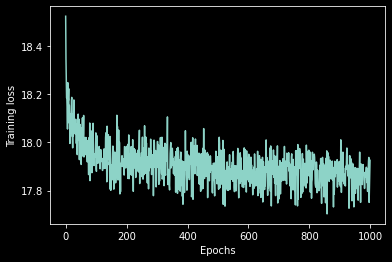

Test loss is 0.24534696713089943


In [48]:
# Define the model parameters
input_size = ord_train_dataset.X.shape[1]
hidden_size = 128
output_size = 1
lr = 0.0001
epochs = 1000
dropout = 0.1

# Instantiate the model and the optimizer
model = ClassifierPredictor(input_size, hidden_size, output_size, dropout)
optimizer = optim.Adagrad(model.parameters(), lr=lr, weight_decay=1e-5)
criterion = nn.SmoothL1Loss()

loss_data = []
# Train the model
model.train()
for epoch in range(epochs):
    train_loss = 0.0
    for X_batch, y_batch in ord_train_dataloader:
        optimizer.zero_grad()
        y_pred = model(X_batch)
        y_pred = y_pred
        loss = criterion(y_pred.squeeze(), y_batch)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    loss_data.append(train_loss)

plt.plot(range(epochs), loss_data)
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.show()


# Evaluate the model
y_pred_df = pd.DataFrame(columns = ['Months', 'Make', "Day", "Size", "PC1", "PC2", "PC3", "YActual", "YPred"])
model.eval()
with torch.no_grad():
    test_loss = 0
    y_predicted = []
    y_actual = []
    for X_batch, y_batch in ord_test_dataloader:
        y_pred_test = model(X_batch)
        y_pred_test = torch.round(y_pred_test)
        test_loss += criterion(y_pred_test.squeeze(), y_batch).item()
        y_batch = y_batch.numpy()
        y_pred_test = y_pred_test.detach().numpy()
        y_predicted.extend(y_pred_test)
        y_actual.extend(y_batch)
        temp_df = pd.DataFrame(np.concatenate((X_batch.numpy(), y_batch.reshape(-1, 1), y_pred_test.reshape(-1, 1)), axis=1), columns = ['Months', 'Make', "Day", "Size", "PC1", "PC2", "PC3", "YActual", "YPred"])
        y_pred_df = pd.concat([y_pred_df, temp_df], axis=0)


print(f'Test loss is {test_loss/len(ord_test_dataloader)}')

Exctract accuracy and display a value count list for both tables alongside the first 5 entries.

In [49]:
from sklearn.metrics import accuracy_score
display(y_pred_df.head(5))
print(f'Test Accuracy is {accuracy_score(y_actual, y_predicted)}')
print(f'Count of Values in YActual: {y_pred_df["YActual"].value_counts()}')
print(f'Count of Values in YPred: {y_pred_df["YPred"].value_counts()}')

,Months,Make,Day,Size,PC1,PC2,PC3,YActual,YPred
0,7.0,1.0,2.0,2.0,1.772356,0.445318,0.259393,0.0,0.0
1,8.0,1.0,5.0,2.0,-0.025253,0.569653,-0.072939,0.0,0.0
2,1.0,9.0,5.0,2.0,1.286959,-1.230760,-0.602862,0.0,0.0
3,6.0,9.0,3.0,2.0,-0.937031,-1.105968,-0.981924,1.0,1.0
4,1.0,1.0,5.0,2.0,0.530396,0.129054,0.067866,0.0,0.0


Test Accuracy is 0.506036217303823
Count of Values in YActual: 0.0    508
1.0    486
Name: YActual, dtype: int64
Count of Values in YPred: 0.0    661
1.0    333
Name: YPred, dtype: int64


Do the same on the one-hot encoded data as we did with the ordinal data.

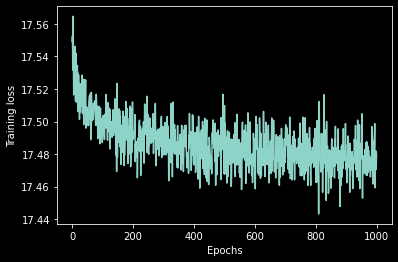

Test loss is 0.24939682893455029


In [64]:
# Define the model parameters
input_size = one_hot_train_dataset.X.shape[1]
hidden_size = 128
output_size = 1
lr = 0.0001
epochs = 1000
dropout = 0.1

# Instantiate the model and the optimizer
model = ClassifierPredictor(input_size, hidden_size, output_size, dropout)
optimizer = optim.Adagrad(model.parameters(), lr=lr, weight_decay=1e-5)
criterion = nn.SmoothL1Loss()

loss_data = []
# Train the model
model.train()
for epoch in range(epochs):
    train_loss = 0.0
    for X_batch, y_batch in one_hot_train_dataloader:
        optimizer.zero_grad()
        y_pred = model(X_batch)
        y_pred = y_pred
        loss = criterion(y_pred.squeeze(), y_batch)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    loss_data.append(train_loss)

plt.plot(range(epochs), loss_data)
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.show()


# Evaluate the model
y_pred_df = pd.DataFrame(columns = ["YActual", "YPred"])
model.eval()
with torch.no_grad():
    test_loss = 0
    y_predicted = []
    y_actual = []
    for X_batch, y_batch in one_hot_test_dataloader:
        y_pred_test = model(X_batch)
        y_pred_test = torch.round(y_pred_test)
        test_loss += criterion(y_pred_test.squeeze(), y_batch).item()
        y_batch = y_batch.numpy()
        y_pred_test = y_pred_test.detach().numpy()
        y_predicted.extend(y_pred_test)
        y_actual.extend(y_batch)

        temp_df = pd.DataFrame(np.concatenate((y_batch.reshape(-1, 1), y_pred_test.reshape(-1, 1)), axis=1), columns = ["YActual", "YPred"])
        y_pred_df = pd.concat([y_pred_df, temp_df], axis=0)


print(f'Test loss is {test_loss/len(one_hot_test_dataloader)}')

In [65]:
from sklearn.metrics import accuracy_score
display(y_pred_df.head(5))
print(f'Test Accuracy is {accuracy_score(y_actual, y_predicted)}')
print(f'Count of Values in YActual: {y_pred_df["YActual"].value_counts()}')
print(f'Count of Values in YPred: {y_pred_df["YPred"].value_counts()}')

,YActual,YPred
0,0.0,0.0
1,0.0,0.0
2,0.0,1.0
3,1.0,0.0
4,0.0,0.0


Test Accuracy is 0.5030181086519114
Count of Values in YActual: 0.0    508
1.0    486
Name: YActual, dtype: int64
Count of Values in YPred: 0.0    674
1.0    320
Name: YPred, dtype: int64


As we can see from the two different tests, over all whether you use one-hot encoding or ordinal encoding - the accuracy is roughly the same. In my case I couldn't seem to get the accuracy to be substantially better than 50% but that could be the type of model I was using. I did try different loss and optimizer methods - but it didn't seem to make much of an impact.